- __NAMA  : Ahmad Fansyuri__
- __NIM   : 09011281722052__
- __KELAS : SK5B__
- __MK    : KECERDASAN BUATAN__

# Data Set yang digunakan adalah tentang fertilitas. Dataset ini memiliki 100 /instances/ dengan 10 atribut.

Dataset ini memiliki fertilitas instances. data ini dapat didownload di <link>https://datahub.io/machine-learning/fertility#data-cli</link> 

Pada data ini terdapat 9 Fitur dan 1 Label, yaitu :

|    Fitur    |         Label        | 
|-------------|----------------------|
|    Season   |                      |
|             |                      |
|    Age      |                      |
|             |                      |
| Childish-Dis|                      |
|             |                      | 
|   Trauma    |                      |
|             |                      |
|   Surgical  |        Output        |
|             |                      |
|    Fevers   |                      |
|             |                      |
|   Alcoholic |                      |
|             |                      |
|   Smoking   |                      |
|             |                      |
|   Sitting   |                      |  
|-------------|----------------------|

In [1]:
#Import Package dan library untuk pengaplikasian Machine Learning dengan menggunakan ANN

import pandas as pd
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


##   <b>Membaca data Fertility.csv menggunakan pandas

In [2]:
dataset = pd.read_csv("C:/Users/asus/Downloads/DATASET UAS/data/fertility_csv.csv")
dataset.head()

,season,age,childish-disease,trauma,surgical-intervention,fevers,alcoholic,smoking,sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


## <b>Data Pre-Processing, Test/Train Split, Label Encode

Teruntuk dataset yang berformat .csv, kita harus melihat atau menganalisis dataset tersebut, yang nantinya akan kita gunakan untuk memisahkan matrix yang berisi fitur(biasa fitur menggunakan variabel X atau features) dan juga membuat matrix yang berisi hasil observasi mereka

In [3]:
X = dataset.iloc[:, 0:9]
y = dataset.iloc[:, 9]

In [4]:
X.head()

,season,age,childish-disease,trauma,surgical-intervention,fevers,alcoholic,smoking,sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [5]:
y

0     N
1     O
2     N
3     N
4     O
     ..
95    N
96    N
97    N
98    N
99    N
Name: output, Length: 100, dtype: object

Setelah kita memisahkan fitur dan label selanjutnya masuk ke tahap <b><i>Encoding Categorical Data</b></i>

Mengapa Menggunakan Encoding ?

Pada dasarnya setiap variabel yang bukan kuantitatif adalah kategorikal, misal warna rambut, jenis kelamin, status penyakit, dll. 

Untuk itu dibutuhkan pengkodean(Encoding) contoh pada tabel merubah nilai output yang sebelumnya memiliki nilai kategorikal N dan O menjadi 0 dan 1.

Perhatikan pada baris di bawah merubah nilai pada variabel y dari yang isinya N & O menjadi 1 & 0.

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

### Splitting/pemisahan Data set ke Training set dan Test Set

Sekarang kita membagi data kita menjadi dua set, set pertama kita sebut dengan "Training Set" dan set kedua kita sebut "Test Set". Pada model ini saya membagi menjadi 80% untuk training dan 20% test. Menggunakan library from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 

disini saya menggunakan dense dengan fungsi aktivasi Rectifier Linear Unit, 9 Input fitur dengan 100 jaringan syaraf pada Hidden Layernya dan output sigmoid

Arsitektur dari Model Jaringan Syaraf Tiruan yang saya buat adalah sebagai berikut:

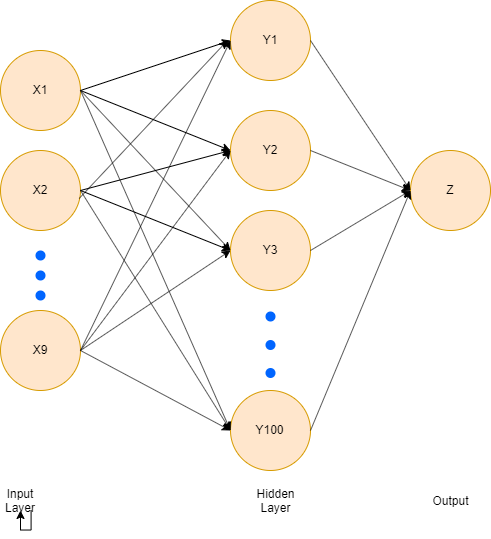

In [9]:
from PIL import Image
myImage = Image.open("C:/Users/asus/Desktop/Praktikum AI (Babak Machine Learning)/Untitled Folder/Diagram Arsitektur ANN.png")
myImage

## Modelling ANN menggunakan Tensorflow dan Keras

In [10]:
model = Sequential()
model.add(Dense(units=100, input_dim = 9, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [11]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history =model.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=115, batch_size=64)


Train on 80 samples, validate on 20 samples
Epoch 1/115
80/80 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5375 - val_loss: 0.6686 - val_accuracy: 0.6500
Epoch 2/115
80/80 [==============================] - 0s 61us/step - loss: 0.6718 - accuracy: 0.5375 - val_loss: 0.6450 - val_accuracy: 0.7000
Epoch 3/115
80/80 [==============================] - 0s 61us/step - loss: 0.6468 - accuracy: 0.6000 - val_loss: 0.6228 - val_accuracy: 0.8000
Epoch 4/115
80/80 [==============================] - 0s 61us/step - loss: 0.6247 - accuracy: 0.6625 - val_loss: 0.6010 - val_accuracy: 0.9000
Epoch 5/115
80/80 [==============================] - 0s 61us/step - loss: 0.6036 - accuracy: 0.7250 - val_loss: 0.5802 - val_accuracy: 0.9000
Epoch 6/115
80/80 [==============================] - 0s 73us/step - loss: 0.5834 - accuracy: 0.8125 - val_loss: 0.5608 - val_accuracy: 0.9000
Epoch 7/115
80/80 [==============================] - 0s 61us/step - loss: 0.5650 - accuracy: 0.8375 - va

80/80 [==============================] - 0s 85us/step - loss: 0.2092 - accuracy: 0.9000 - val_loss: 0.2001 - val_accuracy: 0.9500
Epoch 114/115
80/80 [==============================] - 0s 73us/step - loss: 0.2081 - accuracy: 0.9000 - val_loss: 0.1990 - val_accuracy: 0.9500
Epoch 115/115
80/80 [==============================] - 0s 110us/step - loss: 0.2071 - accuracy: 0.9000 - val_loss: 0.1980 - val_accuracy: 0.9500


In [13]:
acc_testing = model.evaluate(X_test, Y_test)
acc_testing

20/20 [==============================] - 0s 49us/step


[0.19803692400455475, 0.949999988079071]

In [14]:
import matplotlib.pyplot as plt

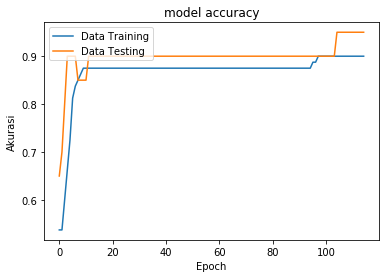

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

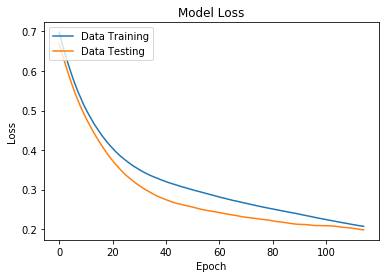

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

## Pengujian kinerja algoritma dengan Confusion Matrix


<div style="text-align: justify"><br>Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau Sistem Pendukung Keputusan. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.<\div>

In [17]:
# Predict test label
y_pred = model.predict_classes(X_test)

Penjelasan singkatan-singkatan pada confusion matrix. 

TP adalah True Positive yaitu jumlah data positif yang terkklasifikasi dengan benar oleh sistem.

TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.

FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.

FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem.

<div style="text-align: justify"><br>Perhatikan Hasil Confusion Matrix di bawah ini. Dapat kita lihat nilai dari <b>TP adalah 18, FP adalah 0 berarti pembacaan data Positif terbaca semua tanpa satupun error, lalu pada pembacaan data TN adalah 1, FN adalah 1 yang berarti pembacaan data negatif pada sistem terbaca benar 1 dan salah satu.<\b><\div>

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[18  0]
 [ 1  1]]


Nah pada line di bawah ini tiap-tiap variabel yang dimunculkan ada artinya tersendiri.

Presisi adalah data yang diambil berdasarkan informasi yang kurang dalam klasifikasi biner, presisi dapat dibuat sama dengan nilai prediksi positif

Recall adalah data penghapusan yang berhasil diambil dari data yang relevan dengan kueri. Dalam klasifikasi biner, recall dikenal sebagai sensitivitas. Munculnya data relevan yang diambil adalah menyetujui dengan query dapat dilihat dengan recall.

Akurasi adalah persentase dari total data yang diidentifikasi dan dinilai.

In [19]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  0.9473684210526315
F1 :  0.972972972972973
sensitivity :  0.9473684210526315
akurasi :  0.95


In [20]:
# Calculate Precision, Recall, F1 Score (class 0)
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20

